In [1]:
import scipy as sp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection

%matplotlib inline

In [2]:
#ref. http://stackoverflow.com/questions/34556180/how-can-i-plot-a-correlation-matrix-as-a-set-of-ellipses-similar-to-the-r-open
#相關係數矩陣圖
def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

## 資料擷取與匯入

### 資料來源: 行政院環保署-空氣品質監測網 , 竹苗空品區-新竹監測站 2015年度
#### 測項簡稱 (單位) 測項名稱
#### SO2     (ppb)  二氧化硫
#### CO      (ppm)  一氧化碳
#### O3      (ppb)  臭氧
#### PM10    (μg/m3) PM10 懸浮微粒
#### PM25    (μg/m3) PM2.5 細懸浮微粒
#### NOX     (ppb)  氮氧化物
#### NO      (ppb)  一氧化氮
#### NO2     (ppb)  二氧化氮
#### THC     (ppm)  總碳氫合物
#### NMHC    (ppm)  非甲烷碳氫化合物
#### CH4     (ppm)  甲烷
#### UVB     (UVI)  紫外線指數
#### AMB_TEMP (℃)  大氣溫度
#### RAINFALL (mm)  雨量
#### RH      (%)   相對溼度
#### WIND_SPEED (m/sec)   風速(以每小時最後10分鐘算術平均)
#### WIND_DIREC (degress) 風向(以每小時最後10分鐘向量平均)
#### WS_HR   (m/sec)   風速小時值(以整個小時算術平均)
#### WD_HR   (degress) 風向小時值(以整個小時向量平均)
 
#### *PRE_PM25 (μg/m3) 前一小時 PM2.5 細懸浮微粒測值 *額外增加項目

In [3]:
# *原始資料已先經SQL語法整理成變數(測項)為欄位, 列為每小時觀測記錄.
#import D:\python.data\PM25_Data\Hsinchu_2015_raw.csv
df1 = pd.read_csv("D:\python.data\PM25_Data\Hsinchu_2015_raw.csv",encoding = "big5")

In [4]:
df1.head(5)

,M_Date,Hour,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,...,PM25,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PRE_PM25
0,2015/1/1,0,16,2,0.78,0.15,0.8,18,19,36,...,68,NR,64,6.6,2.1,68,72,5.1,3.8,68
1,2015/1/1,1,16,2,0.77,0.15,0.7,16,17,36,...,84,NR,63,8.2,2.1,74,69,4.9,3.5,68
2,2015/1/1,2,15,2,0.73,0.15,0.7,15,16,37,...,79,NR,64,7.7,2.1,74,66,4.1,3.3,84
3,2015/1/1,3,15,2,0.69,0.14,0.8,15,16,35,...,73,NR,65,6,2.1,67,71,3.7,2.8,79
4,2015/1/1,4,14,1.9,0.62,0.13,0.7,13,14,35,...,65,NR,67,5,2.1,74,73,3.7,2.7,73


In [5]:
items = df1.columns[2:21]
print(items) #測項共 19項 (包括PRE_PM25: 前一小時PM2.5測值)

Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM25', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
       'WIND_SPEED', 'WS_HR', 'PRE_PM25'],
      dtype='object')


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
M_Date        8760 non-null object
Hour          8760 non-null int64
AMB_TEMP      8726 non-null object
CH4           8720 non-null object
CO            8717 non-null object
NMHC          8714 non-null object
NO            8717 non-null object
NO2           8703 non-null object
NOx           8717 non-null object
O3            8713 non-null object
PM10          8660 non-null object
PM25          8662 non-null object
RAINFALL      8726 non-null object
RH            8726 non-null object
SO2           8711 non-null object
THC           8720 non-null object
WD_HR         8726 non-null object
WIND_DIREC    8726 non-null object
WIND_SPEED    8726 non-null object
WS_HR         8726 non-null object
PRE_PM25      8662 non-null object
dtypes: int64(1), object(20)
memory usage: 1.4+ MB


## 資料預處理

In [7]:
#items 測值欄位,進行轉數值型別(float)
df2 = df1[::][items].apply(lambda x: pd.to_numeric(x, errors='coerce')) #coerce: then invalid parsing will be set as NaN

## 資料聚合與樞紐分析

In [8]:
# df1.drop(items, axis=1) *df1只留 M_Date, Hour 兩個欄位
# concat 把轉好float格式的df2串接起來,by df1.index
df3 = pd.concat([df1.drop(items, axis=1), df2], axis=1, join_axes=[df1.index])

In [9]:
df_date = df3[['M_Date','PM25']]
df_date = df_date.set_index(df_date['M_Date'],drop=True)
del df_date['M_Date']
df_date[0:1]

,PM25
M_Date,
2015/1/1,68.0


In [10]:
df_date.index = pd.to_datetime(df_date.index,format='%Y/%m/%d')
#type(df_date.index)
df_date_grp = df_date.groupby(df_date.index).mean()
df_date_grp[:3]

,PM25
M_Date,
2015-01-01,41.458333
2015-01-02,18.291667
2015-01-03,29.375000


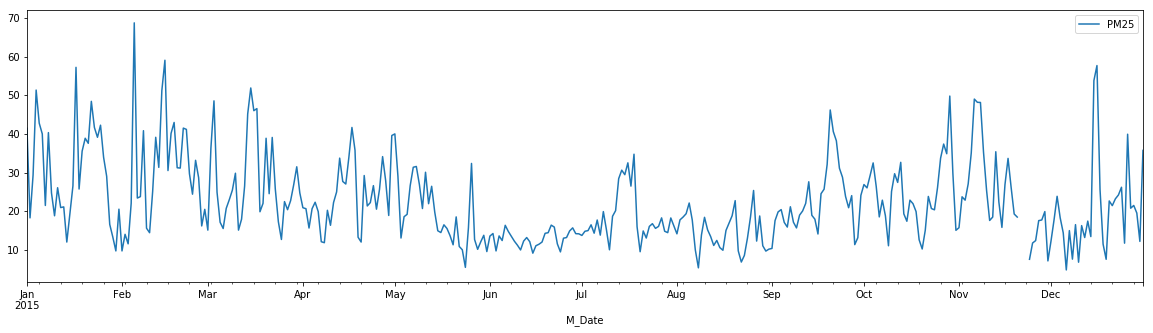

In [11]:
df_date_grp.plot(kind='line',figsize=(20,5))

## 資料分析方法

In [12]:
df3.describe()

,Hour,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM25,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PRE_PM25
count,8760.000000,8721.000000,8643.000000,8647.000000,8643.000000,8633.000000,8633.000000,8633.000000,8649.000000,8557.000000,8523.000000,620.000000,8721.000000,8515.000000,8643.000000,8713.000000,8717.000000,8718.000000,8714.000000,8523.000000
mean,11.500000,23.769522,1.946836,0.431099,0.147269,3.336082,15.200371,18.536720,29.278772,38.689027,22.426258,2.268710,72.382754,2.618509,2.092665,138.156123,137.491981,2.394712,1.893459,22.427549
std,6.922582,5.622619,0.129943,0.212337,0.110623,5.360687,8.274101,11.770368,17.864809,21.579066,12.952653,4.013482,10.779580,1.477937,0.219416,89.191723,89.259123,1.361824,1.183212,12.956646
min,0.000000,11.000000,1.700000,0.000000,-0.030000,-0.300000,2.100000,2.800000,0.700000,1.000000,0.000000,0.200000,31.000000,-0.400000,1.700000,0.200000,0.100000,0.400000,0.000000,0.000000
25%,5.750000,19.000000,1.900000,0.290000,0.080000,1.100000,9.400000,11.000000,16.000000,23.000000,13.000000,0.400000,65.000000,1.700000,2.000000,67.000000,66.000000,1.200000,0.900000,13.000000
50%,11.500000,25.000000,1.900000,0.390000,0.120000,1.800000,13.000000,16.000000,29.000000,34.000000,19.000000,0.800000,73.000000,2.300000,2.000000,80.000000,82.000000,2.200000,1.700000,19.000000
75%,17.250000,28.000000,2.000000,0.520000,0.170000,3.200000,19.000000,22.000000,40.000000,49.000000,28.000000,2.400000,81.000000,3.200000,2.200000,237.000000,237.000000,3.375000,2.800000,28.000000
max,23.000000,37.000000,2.900000,3.060000,1.140000,84.000000,84.000000,122.000000,125.000000,165.000000,94.000000,42.000000,94.000000,55.000000,3.800000,360.000000,359.000000,12.000000,9.400000,94.000000


In [13]:
df3.head()

,M_Date,Hour,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,...,PM25,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PRE_PM25
0,2015/1/1,0,16.0,2.0,0.78,0.15,0.8,18.0,19.0,36.0,...,68.0,NaN,64.0,6.6,2.1,68.0,72.0,5.1,3.8,68.0
1,2015/1/1,1,16.0,2.0,0.77,0.15,0.7,16.0,17.0,36.0,...,84.0,NaN,63.0,8.2,2.1,74.0,69.0,4.9,3.5,68.0
2,2015/1/1,2,15.0,2.0,0.73,0.15,0.7,15.0,16.0,37.0,...,79.0,NaN,64.0,7.7,2.1,74.0,66.0,4.1,3.3,84.0
3,2015/1/1,3,15.0,2.0,0.69,0.14,0.8,15.0,16.0,35.0,...,73.0,NaN,65.0,6.0,2.1,67.0,71.0,3.7,2.8,79.0
4,2015/1/1,4,14.0,1.9,0.62,0.13,0.7,13.0,14.0,35.0,...,65.0,NaN,67.0,5.0,2.1,74.0,73.0,3.7,2.7,73.0


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
M_Date        8760 non-null object
Hour          8760 non-null int64
AMB_TEMP      8721 non-null float64
CH4           8643 non-null float64
CO            8647 non-null float64
NMHC          8643 non-null float64
NO            8633 non-null float64
NO2           8633 non-null float64
NOx           8633 non-null float64
O3            8649 non-null float64
PM10          8557 non-null float64
PM25          8523 non-null float64
RAINFALL      620 non-null float64
RH            8721 non-null float64
SO2           8515 non-null float64
THC           8643 non-null float64
WD_HR         8713 non-null float64
WIND_DIREC    8717 non-null float64
WIND_SPEED    8718 non-null float64
WS_HR         8714 non-null float64
PRE_PM25      8523 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 1.4+ MB


In [15]:
corr = df3[::][items].corr() #只取測項欄位做相關分析
corr

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM25,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PRE_PM25
AMB_TEMP,1.000000,-0.265184,-0.223085,-0.181736,-0.066342,-0.273901,-0.222910,0.005706,-0.319635,-0.237913,0.145217,-0.326649,0.049341,-0.242705,0.519928,0.499716,-0.031575,0.020093,-0.239758
CH4,-0.265184,1.000000,0.586242,0.653039,0.433602,0.581956,0.606520,-0.291954,0.307471,0.387061,-0.054073,0.315365,0.211325,0.895628,-0.059155,-0.043933,-0.455958,-0.467125,0.362604
CO,-0.223085,0.586242,1.000000,0.804890,0.588743,0.808367,0.836515,-0.229030,0.486218,0.532609,-0.119668,0.145151,0.329846,0.755468,-0.050827,-0.035020,-0.350623,-0.360955,0.482678
NMHC,-0.181736,0.653039,0.804890,1.000000,0.669075,0.820364,0.881704,-0.442402,0.283176,0.345107,-0.104560,0.190394,0.302021,0.891788,-0.089494,-0.061558,-0.445380,-0.441732,0.304066
NO,-0.066342,0.433602,0.588743,0.669075,1.000000,0.465777,0.782584,-0.383223,0.080983,0.100248,-0.069833,0.113622,0.213059,0.594063,0.027584,0.042581,-0.243790,-0.244508,0.071403
NO2,-0.273901,0.581956,0.808367,0.820364,0.465777,1.000000,0.914745,-0.402832,0.362754,0.417779,-0.086524,0.202634,0.389784,0.761814,-0.171573,-0.132109,-0.449806,-0.452854,0.364027
NOx,-0.222910,0.606520,0.836515,0.881704,0.782584,0.914745,1.000000,-0.457780,0.291722,0.339431,-0.087173,0.194512,0.371801,0.806131,-0.107821,-0.073301,-0.427755,-0.430050,0.288724
O3,0.005706,-0.291954,-0.229030,-0.442402,-0.383223,-0.402832,-0.457780,1.000000,0.279424,0.223622,-0.021659,-0.424996,0.010731,-0.401352,-0.027333,-0.060424,0.370513,0.311762,0.232154
PM10,-0.319635,0.307471,0.486218,0.283176,0.080983,0.362754,0.291722,0.279424,1.000000,0.901979,-0.110085,-0.151103,0.388319,0.321562,-0.120417,-0.115763,0.006407,-0.034874,0.878003
PM25,-0.237913,0.387061,0.532609,0.345107,0.100248,0.417779,0.339431,0.223622,0.901979,1.000000,-0.089141,-0.068724,0.389122,0.401958,-0.044158,-0.039792,-0.145638,-0.182219,0.963149


## 視覺化

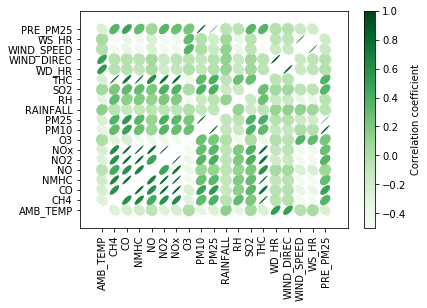

In [16]:
#相關係數矩陣圖
data = df3[::][items].corr()
fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(data, ax=ax, cmap='Greens')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)
plt.show()

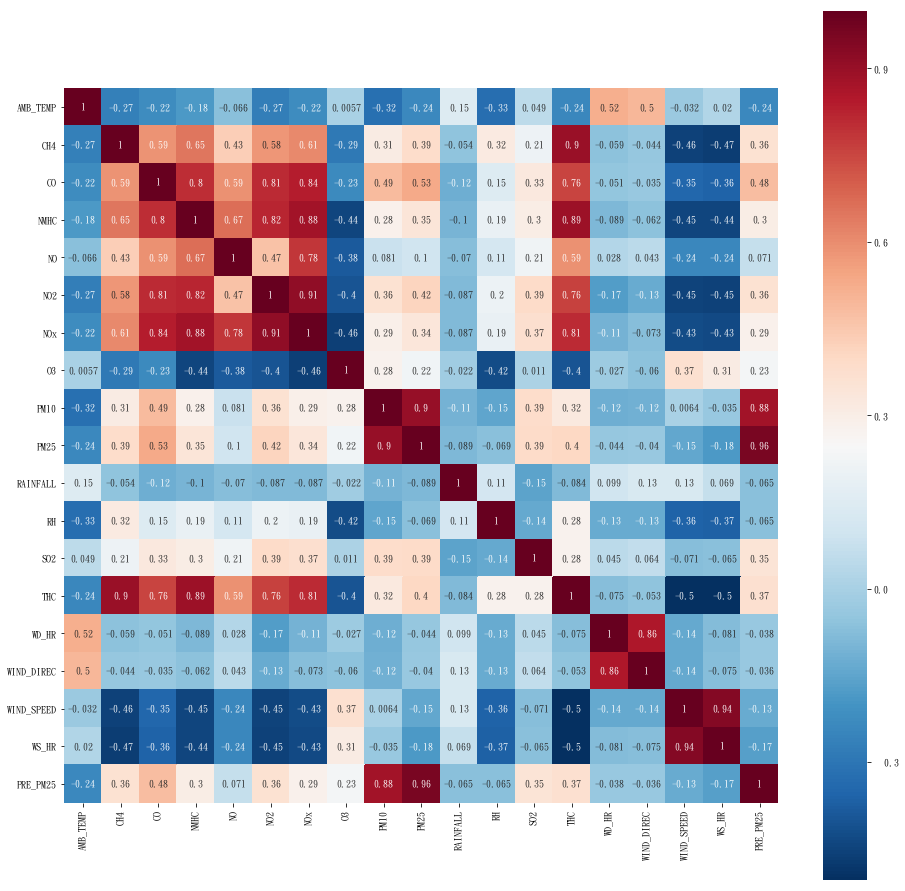

In [17]:
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文
plt.figure(figsize=(16,16))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
#sns.plt.show()

# http://seaborn.pydata.org/tutorial/color_palettes.html

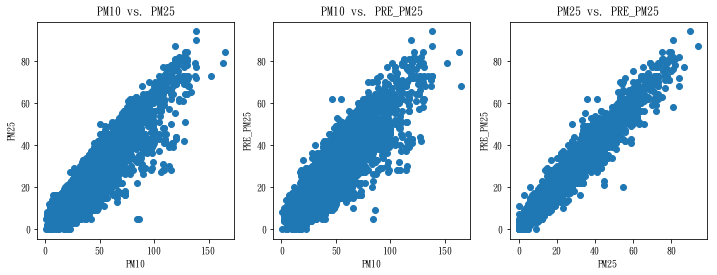

In [18]:
#散佈圖
#PM10,PM25,PRE_PM25
plt.figure(figsize=(12, 4))
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

plt.subplot(1,3,1)
plt.scatter(df3['PM10'],df3['PM25'])
plt.title('PM10 vs. PM25')
plt.xlabel('PM10')
plt.ylabel('PM25')

plt.subplot(1,3,2)
plt.scatter(df3['PM10'],df3['PRE_PM25'])
plt.title('PM10 vs. PRE_PM25')
plt.xlabel('PM10')
plt.ylabel('PRE_PM25')

plt.subplot(1,3,3)
plt.scatter(df3['PM25'],df3['PRE_PM25'])
plt.title('PM25 vs. PRE_PM25')
plt.xlabel('PM25')
plt.ylabel('PRE_PM25')

plt.show()

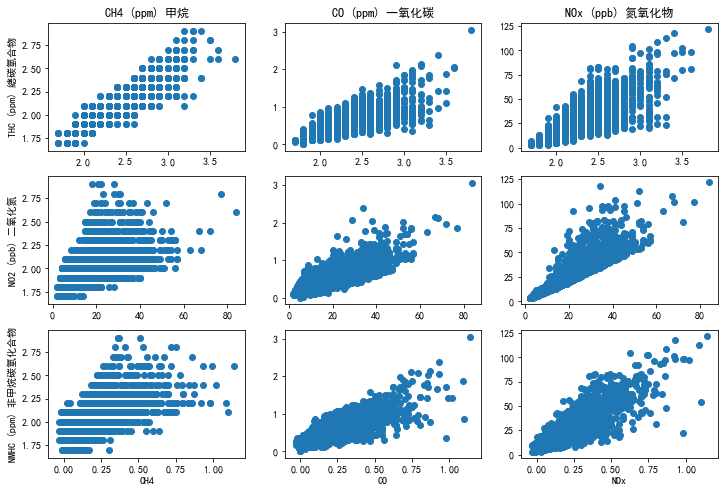

In [19]:
#CH4,CO,NMHC,NO2,NOx,THC
plt.figure(figsize=(12, 8))
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
plt.rcParams['font.family']='SimHei' #黑體字型

plt.subplot(3,3,1)
plt.scatter(df3['THC'],df3['CH4'])
plt.title('CH4 (ppm) 甲烷')
plt.ylabel('THC (ppm) 總碳氫合物')

plt.subplot(3,3,2)
plt.scatter(df3['THC'],df3['CO'])
plt.title('CO (ppm) 一氧化碳')

plt.subplot(3,3,3)
plt.scatter(df3['THC'],df3['NOx'])
plt.title('NOx (ppb) 氮氧化物')

plt.subplot(3,3,4)
plt.scatter(df3['NO2'],df3['CH4'])
#plt.title('NO2 vs. CH4')
plt.ylabel('NO2 (ppb) 二氧化氮')

plt.subplot(3,3,5)
plt.scatter(df3['NO2'],df3['CO'])
#plt.title('NO2 vs. CO')

plt.subplot(3,3,6)
plt.scatter(df3['NO2'],df3['NOx'])
#plt.title('NO2 vs. NOx')

plt.subplot(3,3,7)
plt.scatter(df3['NMHC'],df3['CH4'])
#plt.title('NMHC vs. CH4')
plt.xlabel('CH4')
plt.ylabel('NMHC (ppm) 非甲烷碳氫化合物')

plt.subplot(3,3,8)
plt.scatter(df3['NMHC'],df3['CO'])
#plt.title('NMHC vs. CO')
plt.xlabel('CO')

plt.subplot(3,3,9)
plt.scatter(df3['NMHC'],df3['NOx'])
#plt.title('NMHC vs. NOx')
plt.xlabel('NOx')

plt.show()

## 基礎機器學習

In [20]:
from sklearn.model_selection import train_test_split
X = df3[['PM10']]
y = df3[['PM25']]

#將指定欄位中的NaN替代成該欄平均值。
#df['column_name'].replace([float('nan')], sp.mean(df['column_name']))
X = X.replace([float('nan')], sp.mean(X))
y = y.replace([float('nan')], sp.mean(y))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) # 20% for testing, 80% for training
X_train.head()

,PM10
2499,23.0
5940,33.0
4622,37.0
583,83.0
5975,26.0


各變項參數: 
 [[ 0.53817859]]
均方誤差 (Mean squared error, MSE): 32.38
R Square: 0.803692863992


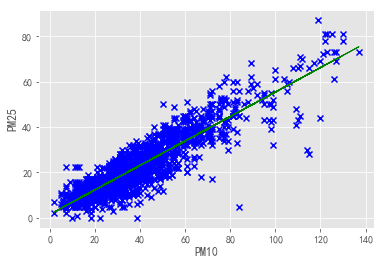

In [21]:
from sklearn import datasets, linear_model
plt.style.use('ggplot')

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
print("R Square:",regr.score(X_test,y_test))

plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)

plt.ylabel('PM25')
plt.xlabel('PM10')

plt.show()

## 多變項線性迴歸

In [22]:
#預處理:將X因子與y因子去除小於零的記錄
df4 = df3[['THC','CH4','CO','NMHC','NO2','NOx']]
df4 = df4[df4['THC'] > 0]
df4 = df4[df4['CH4'] > 0]
df4 = df4[df4['CO'] > 0]
df4 = df4[df4['NMHC'] > 0]
df4 = df4[df4['NO2'] > 0]
df4 = df4[df4['NOx'] > 0]

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8550 entries, 0 to 8759
Data columns (total 6 columns):
THC     8550 non-null float64
CH4     8550 non-null float64
CO      8550 non-null float64
NMHC    8550 non-null float64
NO2     8550 non-null float64
NOx     8550 non-null float64
dtypes: float64(6)
memory usage: 467.6 KB


In [24]:
from sklearn.model_selection import train_test_split
X = df4[['CH4','CO','NMHC','NO2','NOx']]
y = df4[['THC']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,CH4,CO,NMHC,NO2,NOx
870,1.9,0.27,0.07,9.9,11.0
3000,2.2,0.64,0.28,22.0,35.0
1475,2.0,0.67,0.13,15.0,19.0
7337,2.0,0.59,0.21,20.0,22.0
7339,2.0,0.66,0.21,20.0,21.0


In [26]:
## 標準化 (Normalize)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_nor = sc.transform(X_train)
X_test_nor = sc.transform(X_test)
X_train_nor[:10]

array([[-0.36172965, -0.76954514, -0.71732629, -0.64582931, -0.64608393],
       [ 1.95869046,  1.00548661,  1.22433492,  0.82332658,  1.40401107],
       [ 0.41174372,  1.14940811, -0.16256595, -0.02659832,  0.03728107],
       [ 0.41174372,  0.76561746,  0.57711452,  0.58049089,  0.29354295],
       [ 0.41174372,  1.10143428,  0.57711452,  0.58049089,  0.20812232],
       [-1.13520302, -1.15333579, -0.71732629, -1.26506031, -0.9706823 ],
       [ 0.41174372, -0.14588533, -0.16256595, -0.14801616, -0.30440143],
       [ 0.41174372,  0.42980064, -0.34748606, -0.14801616, -0.2189808 ],
       [ 0.41174372,  0.5257483 ,  0.11481423,  0.45907305,  0.1227017 ],
       [ 0.41174372,  0.42980064,  0.02235417,  1.30899794,  0.80606669]])

In [27]:
from sklearn import datasets, linear_model
plt.style.use('ggplot')

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_nor, y_train)

print('各變項參數(normalized): \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test_nor) - y_test) ** 2))
print("R Square:",regr.score(X_test_nor,y_test))

各變項參數(normalized): 
 [[ 0.1186184   0.00287249  0.11254109  0.00377434 -0.00259808]]
均方誤差 (Mean squared error, MSE): 0.00
R Square: 0.969387464851


### 多變項線性迴歸 for: 'PM25' <- ['WD_HR','WIND_DIREC','WIND_SPEED','WS_HR', 'PRE_PM25']

In [28]:
df5 = df3[['PM25','WD_HR','WIND_DIREC','WIND_SPEED','WS_HR','PRE_PM25']]
df5 = df5[df5['PM25'] > 0]
df5 = df5[df5['WD_HR'] > 0]
df5 = df5[df5['WIND_DIREC'] > 0]
df5 = df5[df5['WIND_SPEED'] > 0]
df5 = df5[df5['WS_HR'] > 0]
df5 = df5[df5['PRE_PM25'] > 0]

In [29]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8389 entries, 0 to 8759
Data columns (total 6 columns):
PM25          8389 non-null float64
WD_HR         8389 non-null float64
WIND_DIREC    8389 non-null float64
WIND_SPEED    8389 non-null float64
WS_HR         8389 non-null float64
PRE_PM25      8389 non-null float64
dtypes: float64(6)
memory usage: 458.8 KB


In [30]:
from sklearn.model_selection import train_test_split
X = df5[['WD_HR','WIND_DIREC','WIND_SPEED','WS_HR','PRE_PM25']]
y = df5[['PM25']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PRE_PM25
236,64.0,66.0,3.1,2.9,28.0
5919,281.0,222.0,1.8,1.2,17.0
5176,298.0,69.0,1.5,0.7,12.0
5558,276.0,285.0,2.1,1.6,32.0
1407,286.0,294.0,1.7,0.8,22.0


In [32]:
## 標準化 (Normalize)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_nor = sc.transform(X_train)
X_test_nor = sc.transform(X_test)
X_train_nor[:10]

array([[-0.83501811, -0.80373422,  0.52059841,  0.84909311,  0.44136378],
       [ 1.59519907,  0.94312531, -0.44303884, -0.59618655, -0.41480083],
       [ 1.78558475, -0.77014077, -0.66541667, -1.0212688 , -0.80396656],
       [ 1.53920328,  1.64858781, -0.22066101, -0.25612074,  0.75269636],
       [ 1.65119486,  1.74936817, -0.51716478, -0.93625235, -0.0256351 ],
       [-0.01747961, -0.44540406, -0.51716478, -1.27631815,  1.60886097],
       [-0.77902232, -0.71415168,  1.41010972,  1.52922472, -0.64830027],
       [-0.92461137, -0.94930585,  0.59472435,  0.33899441,  1.06402894],
       [-1.01420463, -1.03888839, -1.4066761 , -1.10628525, -1.19313229],
       [-0.90221306, -0.92691021,  0.07584276,  0.16896151, -1.27096544]])

In [33]:
from sklearn import datasets, linear_model
plt.style.use('ggplot')

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_nor, y_train)

print('各變項參數(normalized): \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test_nor) - y_test) ** 2))
print("R Square:",regr.score(X_test_nor,y_test))

各變項參數(normalized): 
 [[ -0.2485653    0.18114457   0.08982807  -0.35436879  12.28091015]]
均方誤差 (Mean squared error, MSE): 11.38
R Square: 0.933882861126
